In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('G:\\研究生学习资料\\Illinois Courses\\Fall 2019\\IE 598 Machine Learning\\homework\\hw4\\housing2.csv',header=0)
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EDA PLOT 

In [16]:
#df.shape
# df['ATT1'].dtype
df=df.dropna()

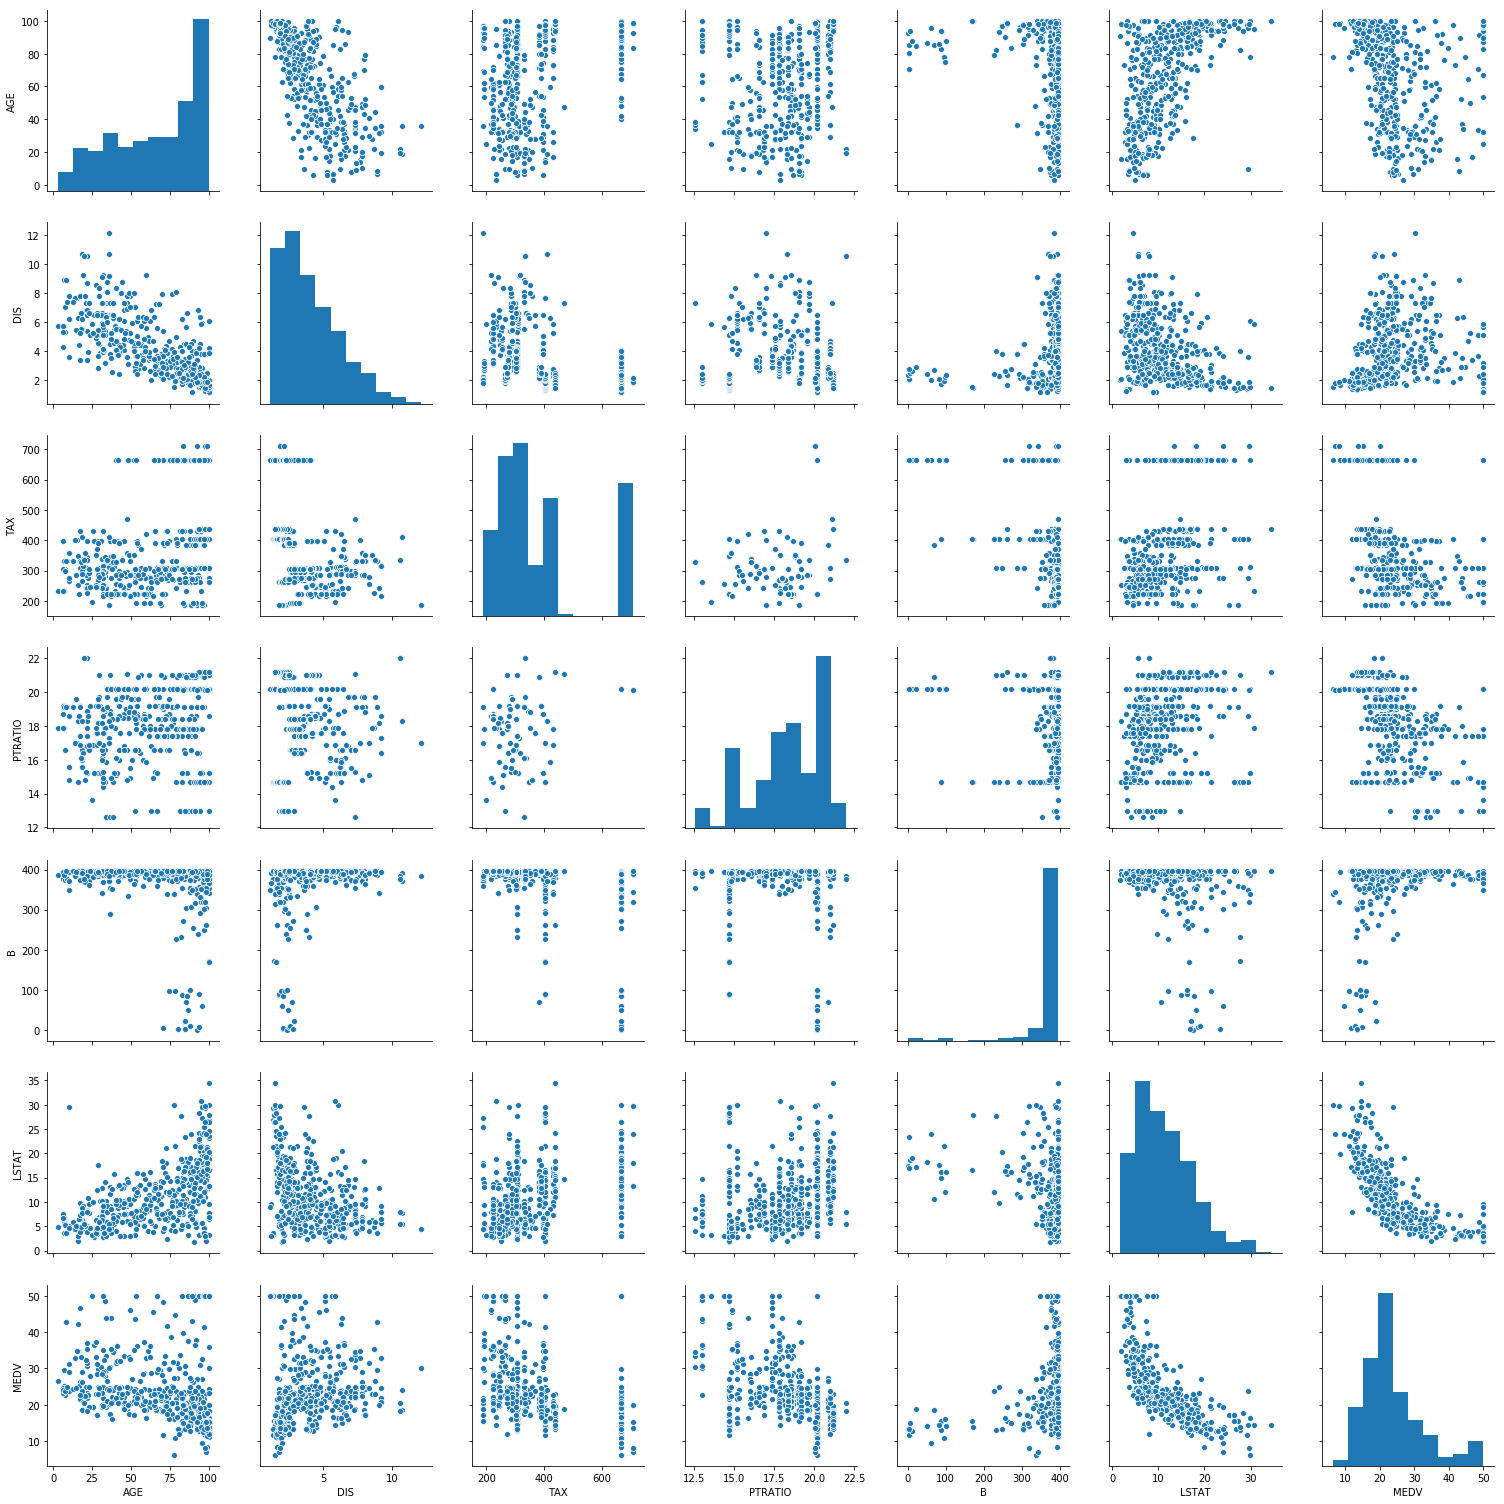

In [3]:
#Part of pairplot. Because 14x14 is too small in figure to plot.
import matplotlib.pyplot as plt
cols=['AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']
sns.pairplot(df[cols],height=3)
plt.tight_layout()
plt.show()

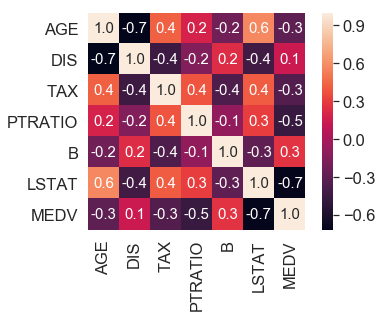

In [4]:
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,
               cbar=True, 
               annot=True, 
               square=True, fmt='.1f',
               annot_kws={'size':15},
               yticklabels=cols,xticklabels=cols)
plt.show()

# Ordinary Least Squares Linear Rgression Model (Gradient Descent)

In [5]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

In [6]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

G:\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
G:\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


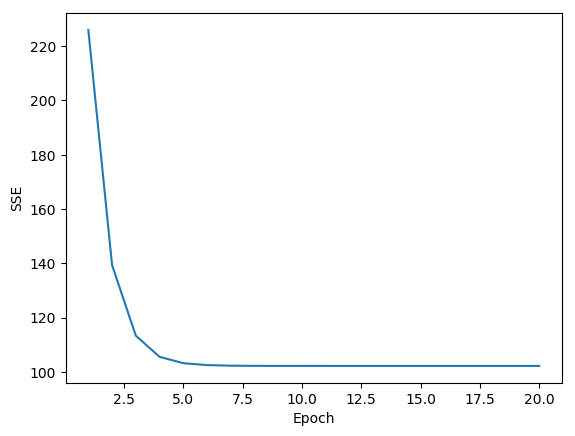

In [7]:
sns.reset_orig() # resets matplotlib style
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [8]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

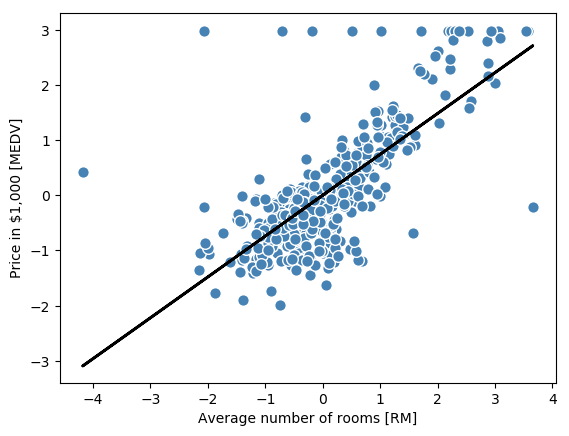

In [9]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1,000 [MEDV]')
plt.show()

In [10]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.740


In [11]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: 0.000


# Linear Regression Model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
df=pd.read_csv('G:\\研究生学习资料\\Illinois Courses\\Fall 2019\\IE 598 Machine Learning\\homework\\hw4\\housing2.csv',header=0)
df=df.dropna()
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

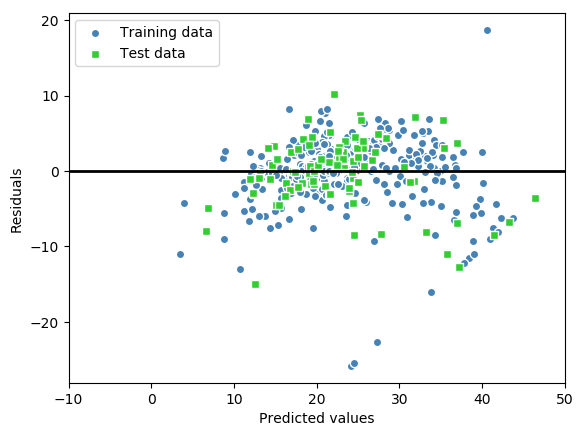

In [112]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s', edgecolor='white',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.684, test: 19.960


In [114]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.741, test: 0.758


# Ridge

In [115]:
from sklearn.linear_model import Ridge
mse_standard=128
tmp=[]
for a in np.arange(0,128,0.04):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred=ridge.predict(X_test)
    tmp.append(mean_squared_error(y_pred, y_test))
    if mean_squared_error(y_pred, y_test) < mse_standard:
        optimization=a
        mse_standard=mean_squared_error(y_pred, y_test)
print(optimization)

8.32


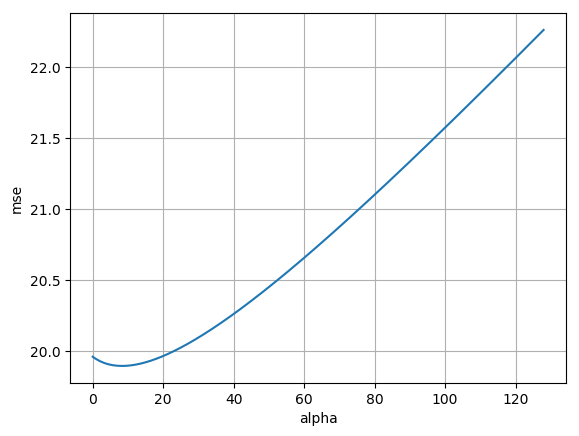

In [116]:
plt.plot(np.arange(0,128,0.04),tmp)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.grid()
plt.show()

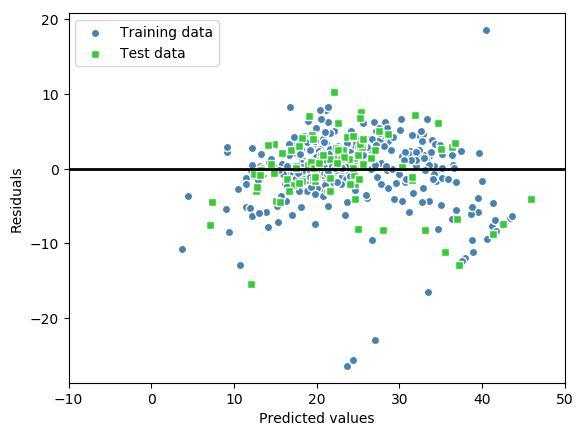

In [117]:
ridge=Ridge(alpha=8.32)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s', edgecolor='white',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [118]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.739, test: 19.896


In [119]:
print('R^2 train: %.3f, test: %.3f' %
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.740, test: 0.758


# Lasso

In [120]:
from sklearn.linear_model import Lasso
mse_standard=128
tmp=[]
for a in np.arange(0.0001,0.1,0.0001):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred=lasso.predict(X_test)
    tmp.append(mean_squared_error(y_pred, y_test))
    if mean_squared_error(y_pred, y_test) < mse_standard:
        optimization=a
        mse_standard=mean_squared_error(y_pred, y_test)
print(optimization)

0.0109


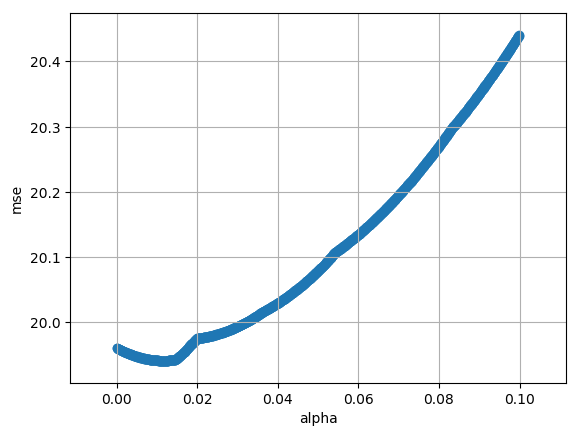

In [121]:
plt.scatter(np.arange(0.0001,0.1,0.0001),tmp)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.grid()
plt.show()

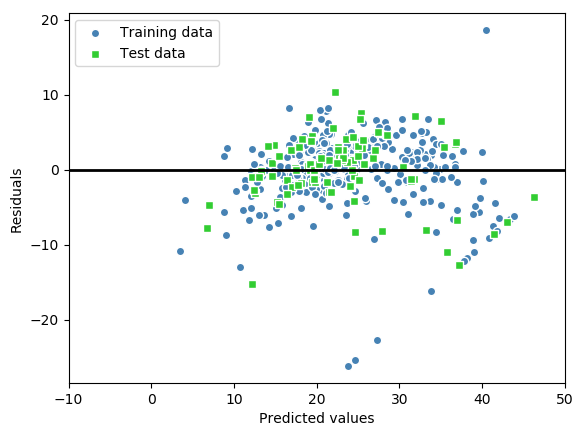

In [122]:
lasso=Lasso(alpha=0.0109)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s', edgecolor='white',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [123]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.694, test: 19.941


In [124]:
print('R^2 train: %.3f, test: %.3f' %
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.741, test: 0.758


In [125]:
print("My name is {Zihan Chen}")
print("My NetID is: {zihanc7}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zihan Chen}
My NetID is: {zihanc7}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
